# OBJETIVO

O objetivo deste estudo é realizar uma análise de clusterização utilizando o método K-Means em dados meteorológicos da cidade de Vila Velha, ES. A proposta é agrupar observações diárias de diferentes variáveis climáticas, a fim de identificar padrões comportamentais distintos entre os dias analisados. Além disso, será feita uma interpretação dos clusters gerados, associando as características médias de cada grupo com as condições climáticas predominantes. Essa análise visa auxiliar na compreensão dos fatores climáticos da região e como eles se comportam ao longo do período estudado.



# BIBLIOTECAS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pingouin as pg

# DADOS

In [3]:
df = pd.read_csv('previsao_vv_modificado_ajustado.csv', sep = ';')
df = df.drop(columns='Unnamed: 11', axis=1)
df.head()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,2024-01-01,1.0,1010.4,20.6,24.7,23.0,22.1,86.8,76,10.6,3.2
1,2024-01-02,7.4,1008.8,21.8,28.7,24.1,21.8,87.9,67,5.7,1.6
2,2024-01-03,1.0,1008.1,23.2,29.7,25.6,23.5,87.5,62,9.7,2.8
3,2024-01-04,1.2,1006.0,23.9,30.4,25.7,24.3,90.7,66,7.6,2.7
4,2024-01-05,13.6,1005.0,22.6,29.4,25.0,22.9,87.2,70,7.5,1.5


## DESCRIÇÃO DE CADA COLUNA:

**DATA MEDICAO:**

Representa a data da medição de todas as variáveis meteorológicas no formato YYYY-MM-DD.

**PRECIPITACAO TOTAL, DIARIO (AUT)(mm):**

Quantidade total de precipitação em milímetros registrada no dia. Indica a quantidade de chuva acumulada.

**PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB):**

Pressão atmosférica média diária em milibares (mB). Reflete a força que o ar exerce sobre a superfície em um determinado dia.

**TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C):**

Temperatura média diária do ponto de orvalho em graus Celsius (°C). Indica a temperatura na qual o ar fica saturado e começa a formar orvalho.

**TEMPERATURA MAXIMA, DIARIA (AUT)(°C):**

Temperatura máxima registrada no dia em graus Celsius (°C).

**TEMPERATURA MEDIA, DIARIA (AUT)(°C):**

Temperatura média do dia em graus Celsius (°C), calculada com base nas temperaturas medidas ao longo do dia.

**TEMPERATURA MINIMA, DIARIA (AUT)(°C):**

Temperatura mínima registrada no dia em graus Celsius (°C).

**UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%):**

Umidade relativa do ar média diária em porcentagem (%). Indica a quantidade de vapor d'água no ar em relação ao máximo que o ar pode reter.

**UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%):**

Umidade relativa do ar mínima registrada durante o dia, em porcentagem (%).

**VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s):**

Velocidade máxima das rajadas de vento registradas no dia, em metros por segundo (m/s).

**VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s):**

Velocidade média diária do vento em metros por segundo (m/s).

## INFORMAÇÔES SOBRE A BASE DE DADOS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Data Medicao                                            245 non-null    object 
 1   PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                    212 non-null    float64
 2   PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)              216 non-null    float64
 3   TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)  216 non-null    float64
 4   TEMPERATURA MAXIMA, DIARIA (AUT)(°C)                    216 non-null    float64
 5   TEMPERATURA MEDIA, DIARIA (AUT)(°C)                     212 non-null    float64
 6   TEMPERATURA MINIMA, DIARIA (AUT)(°C)                    216 non-null    float64
 7   UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)           219 non-null    float64
 8   UMIDADE RELATIVA DO AR, MINIMA DIARIA (A

É possível identificar uma variável categórica, e variáveis numéricas dos tipos int e float. Além disso, observamos a  presença de valores nulos.

Vamos criar um dataframe contendo apenas as variáveis numéricas, que será utilizado em etapas posteriores.

In [5]:
#colunas numéricas do dataset
numdf = df.select_dtypes(include=['float64', 'int64'])
numdf.head()

,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,1.0,1010.4,20.6,24.7,23.0,22.1,86.8,76,10.6,3.2
1,7.4,1008.8,21.8,28.7,24.1,21.8,87.9,67,5.7,1.6
2,1.0,1008.1,23.2,29.7,25.6,23.5,87.5,62,9.7,2.8
3,1.2,1006.0,23.9,30.4,25.7,24.3,90.7,66,7.6,2.7
4,13.6,1005.0,22.6,29.4,25.0,22.9,87.2,70,7.5,1.5


# ANÁLISE EXPLORATÓRIA DOS DADOS

## HISTOGRAMAS

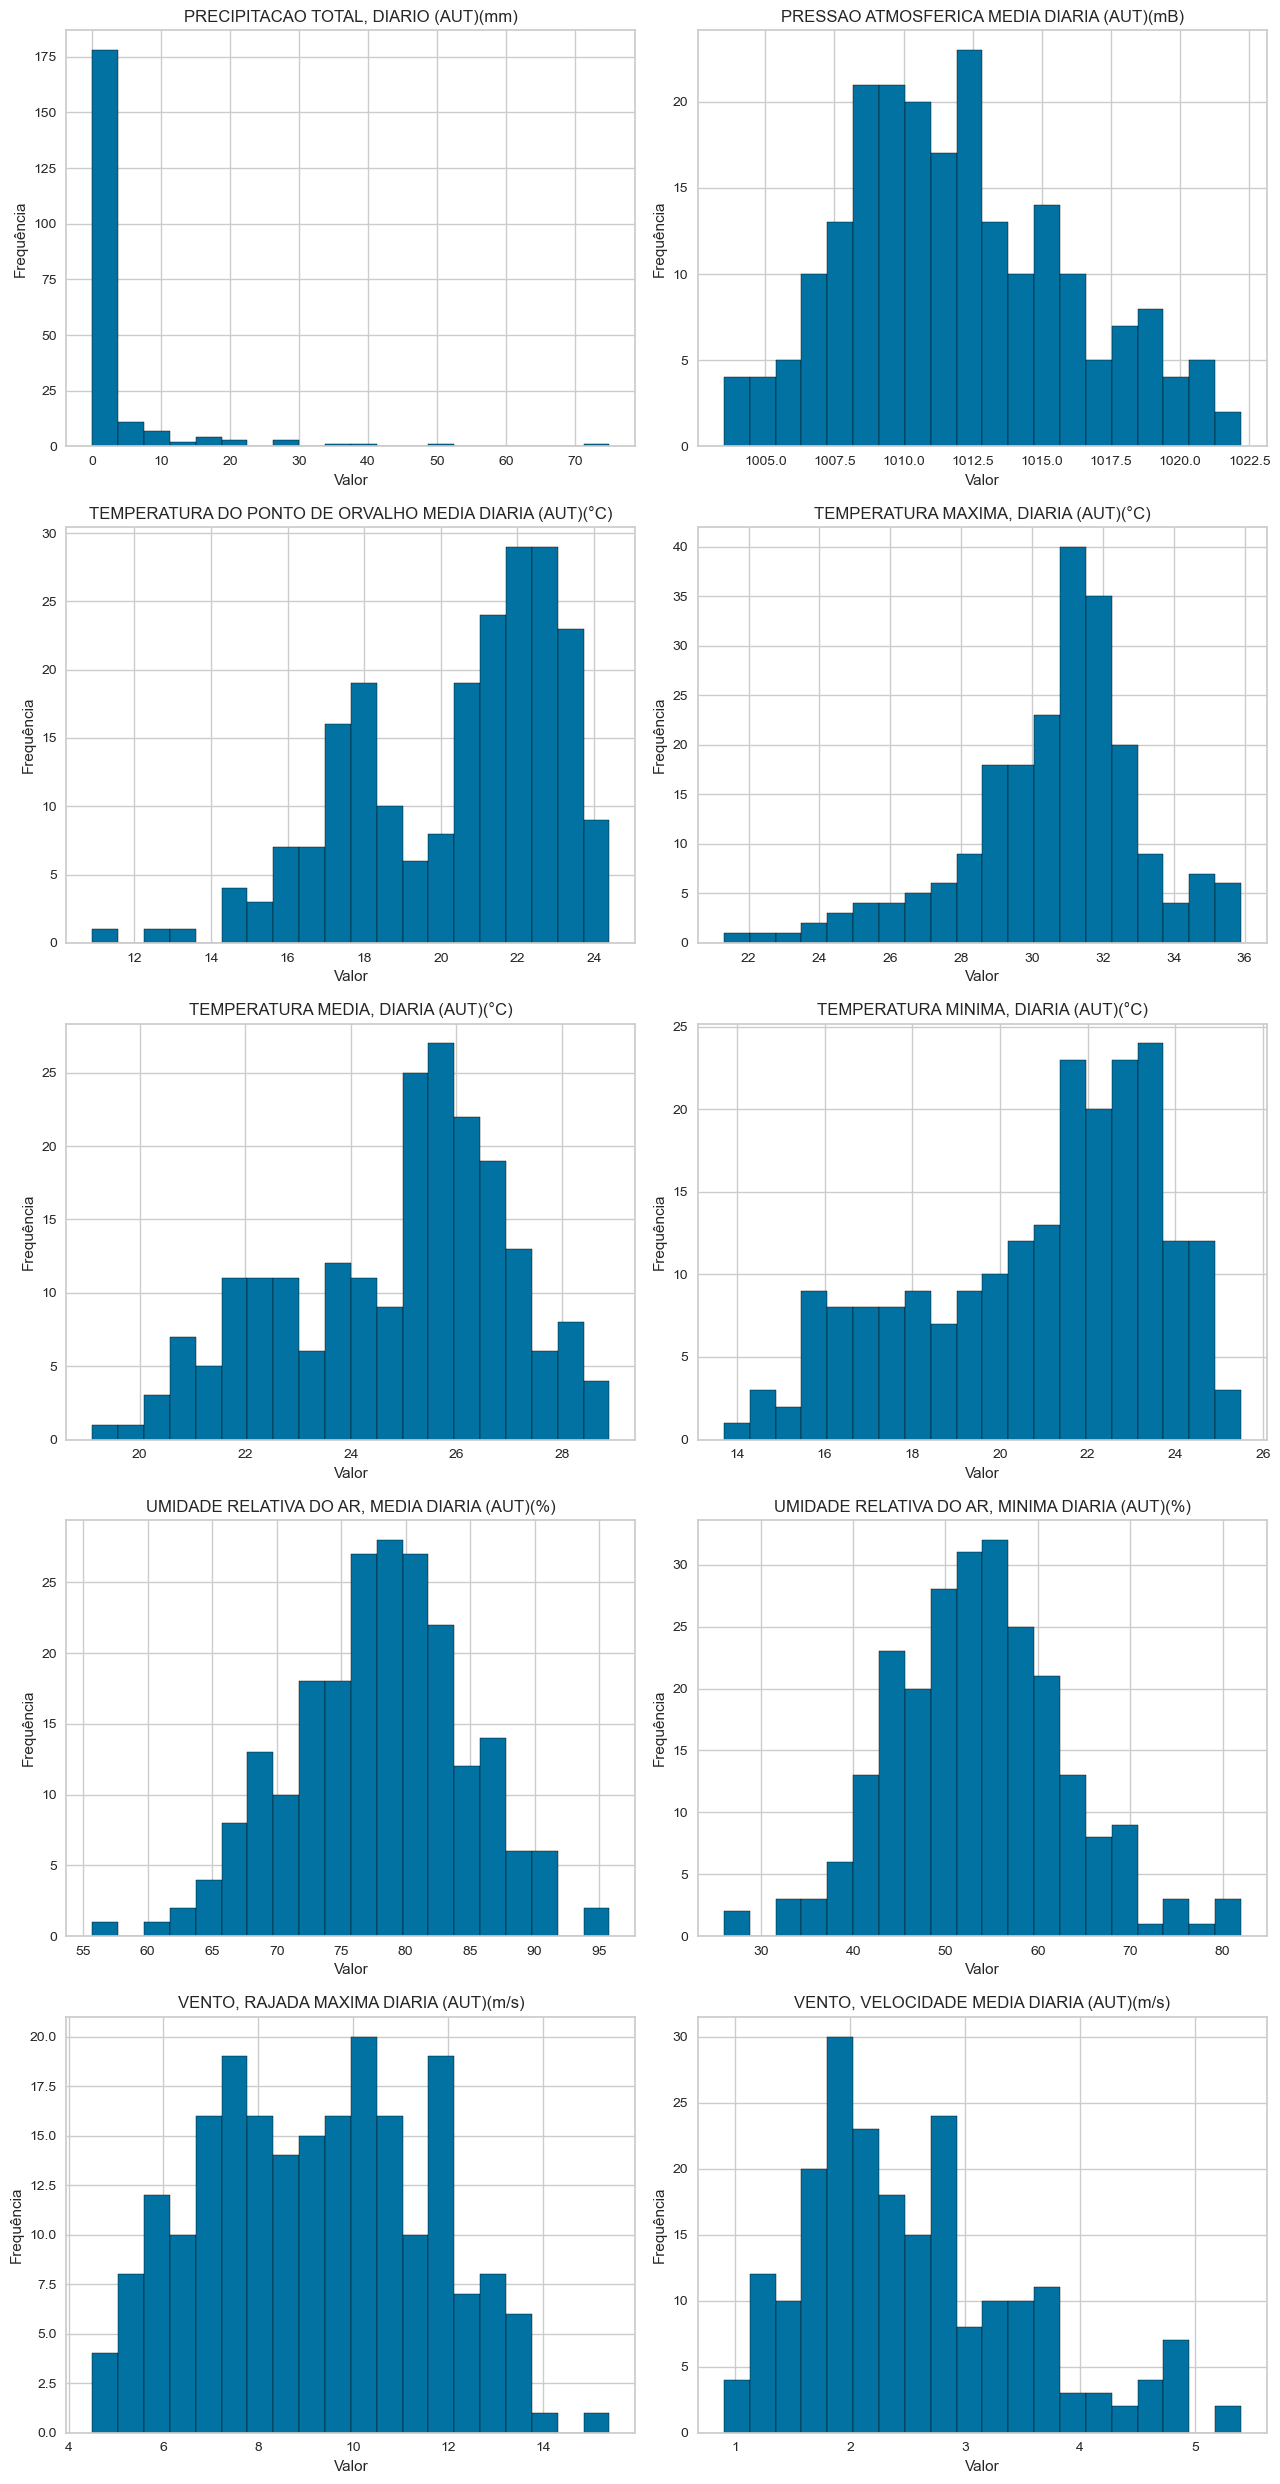

In [11]:
# Definir as colunas para plotar, excluindo 'Data Medicao' e colunas desnecessárias
colunas_para_histograma = numdf.columns

# Definir o número de colunas por linha (2 histogramas por linha)
n_colunas = 2
n_linhas = (len(colunas_para_histograma) + 1) // 2  # Calcula o número de linhas necessárias

# Criar uma figura com subgráficos
fig, axes = plt.subplots(n_linhas, n_colunas, figsize=(13, 5 * n_linhas))

# Caso haja apenas um eixo (quando há um número ímpar de histogramas), ajusta para uma lista de eixos
axes = axes.flatten()

# Criar histogramas para cada variável
for i, coluna in enumerate(colunas_para_histograma):
    axes[i].hist(df[coluna].dropna(), bins=20, edgecolor='black')
    axes[i].set_title(f'{coluna}')
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frequência')
    axes[i].grid(True)

# Remover eixos vazios, se houver
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Ajustar o layout para que os gráficos não se sobreponham
plt.tight_layout()
plt.show()

**PRECIPITACAO TOTAL, DIARIO (AUT)(mm)::**

O histograma mostra que a maioria dos dias tem pouca ou nenhuma precipitação, com uma grande concentração de valores próximos de 0 mm. Poucos dias registram precipitação acima de 10 mm, e eventos acima de 30 mm são raros. A distribuição indica que dias com chuvas intensas são menos frequentes, enquanto a maioria dos dias apresenta condições secas ou com chuvas leves.

**PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB):**

O histograma mostra que a pressão atmosférica média diária se concentra principalmente entre 1010 mB e 1012,5 mB, sendo essa a faixa mais comum. A distribuição tem um formato quase simétrico, com menos ocorrências de pressões muito baixas (abaixo de 1005 mB) e muito altas (acima de 1020 mB). Isso sugere que as condições atmosféricas são geralmente estáveis, com pequenas variações ao redor da média.

**TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C):**

O histograma mostra que a temperatura do ponto de orvalho média diária se concentra principalmente entre 20°C e 24°C, com o pico de frequência em torno de 22°C. Valores abaixo de 16°C são raros, indicando que, na maioria dos dias, o ar está relativamente úmido.

**TEMPERATURA MAXIMA, DIARIA (AUT)(°C):**

O histograma mostra que a temperatura máxima diária se concentra principalmente entre 30°C e 32°C, sendo essa a faixa mais comum. Há poucos dias com temperaturas máximas abaixo de 26°C ou acima de 34°C, o que indica que a maioria dos dias apresenta temperaturas elevadas, com variações leves. Esse padrão sugere um clima predominantemente quente.

**TEMPERATURA MEDIA, DIARIA (AUT)(°C):**

O histograma mostra que a temperatura média diária se concentra principalmente entre 24°C e 26°C, com um pico de frequência próximo a 26°C. Poucos dias têm temperaturas médias abaixo de 22°C ou acima de 28°C. Isso sugere um clima predominantemente quente.

**TEMPERATURA MINIMA, DIARIA (AUT)(°C):**

O histograma mostra que a temperatura mínima diária se concentra entre 22°C e 24°C, com a maioria das ocorrências nessa faixa. Há poucos dias com temperaturas mínimas abaixo de 16°C, o que sugere que a maior parte dos dias tem temperaturas mínimas relativamente elevadas, apontando para um clima predominantemente quente.

**UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%):**

O histograma mostra que a umidade relativa do ar média diária se concentra principalmente entre 75% e 80%, com a maior frequência nessa faixa. A distribuição é aproximadamente simétrica, com menos ocorrências abaixo de 65% e acima de 90%. Isso sugere que a maioria dos dias apresenta um nível de umidade moderadamente alto.

**UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%):**

O histograma da umidade relativa do ar mínima diária mostra que a maior parte dos valores se concentra entre 45% e 55%, com o pico de frequência próximo a 50%. Há poucas ocorrências de umidades abaixo de 30% ou acima de 70%, indicando que a umidade mínima geralmente permanece em uma faixa moderada. Isso sugere que, mesmo nos dias mais secos, a umidade raramente cai para níveis extremamente baixos, refletindo um clima com umidade controlada.

**VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s):**

O histograma da velocidade máxima das rajadas de vento diárias mostra que a maioria das rajadas de vento varia entre 7 m/s e 12 m/s, com picos de frequência em torno de 10 m/s. Rajadas de vento abaixo de 6 m/s ou acima de 14 m/s são menos frequentes. Isso indica que a velocidade máxima das rajadas de vento se mantém em uma faixa moderada, com eventos de ventos muito fortes sendo relativamente raros.

**VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s):**

O histograma revela que a maioria das observações se concentra entre 1,5 e 3 m/s, com um pico em torno de 2 m/s. Isso indica que, em geral, a velocidade média do vento tende a se concentrar em níveis mais baixos, com uma diminuição gradual nas frequências à medida que a velocidade aumenta. Há uma quantidade menor de ocorrências com velocidades médias diárias do vento acima de 4 m/s, sugerindo que ventos mais fortes são menos frequentes.

## GRÁFICOS DE LINHA

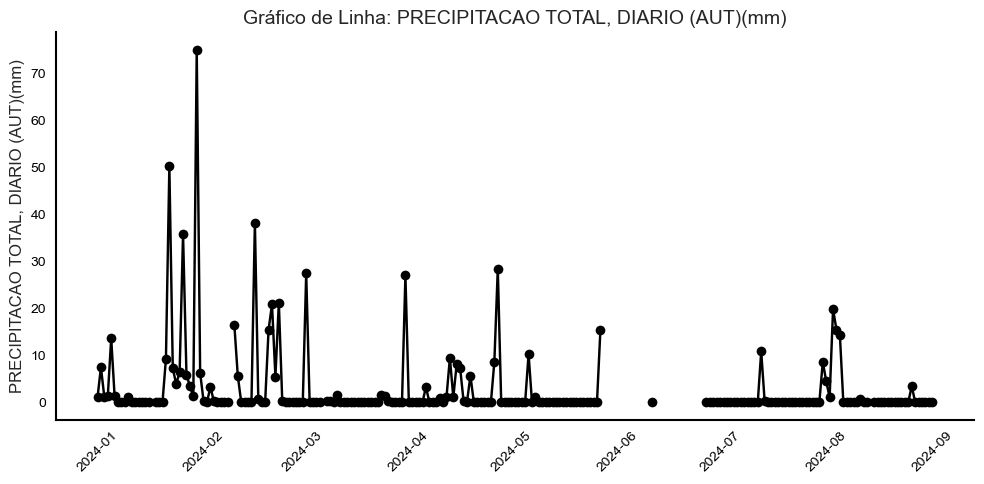

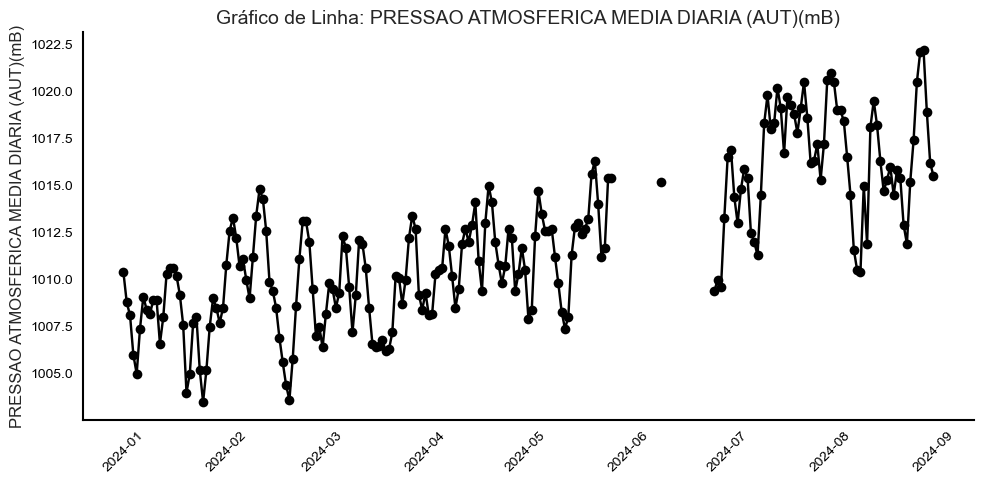

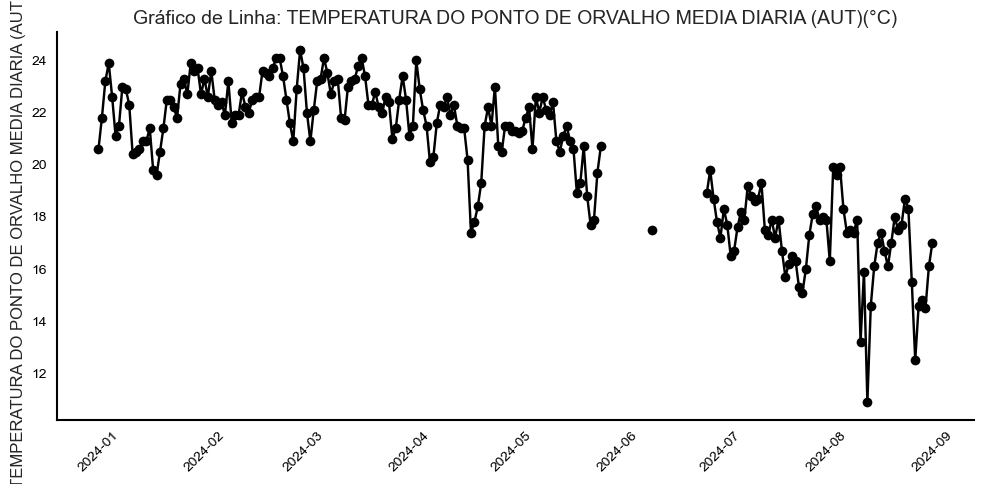

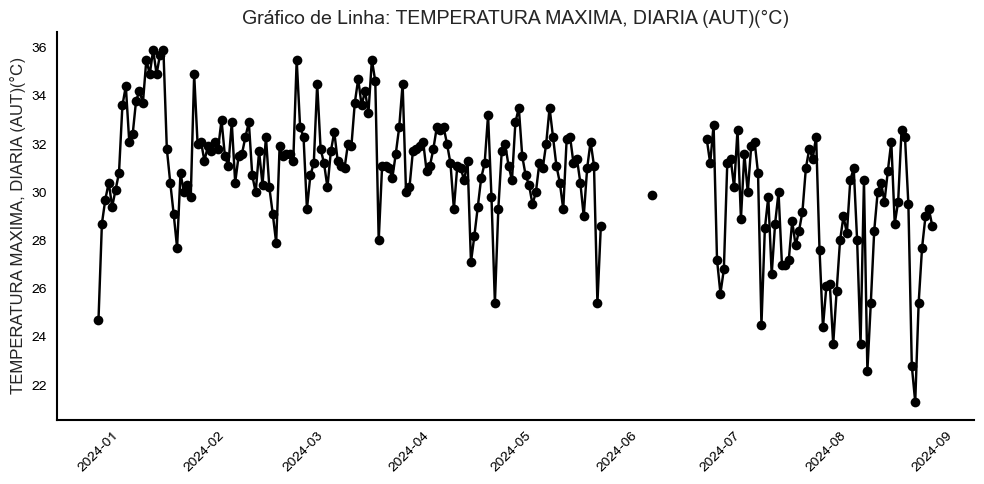

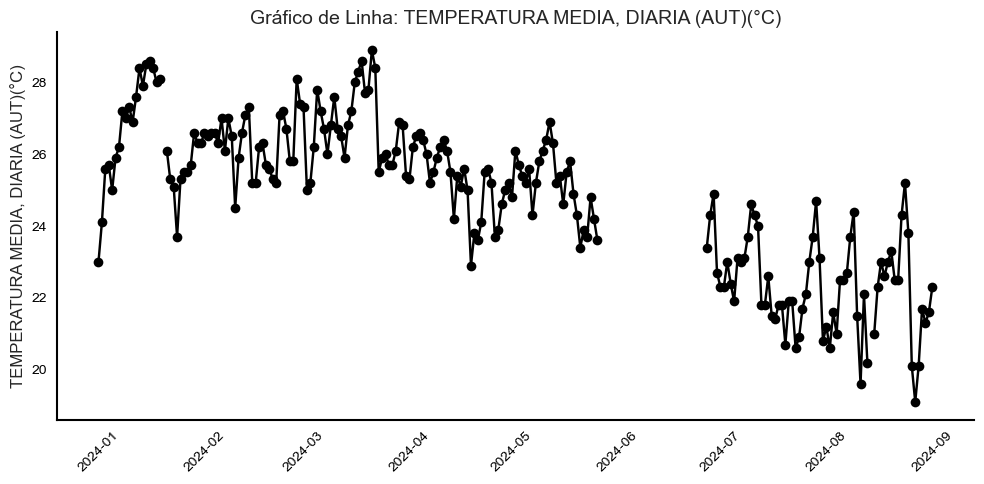

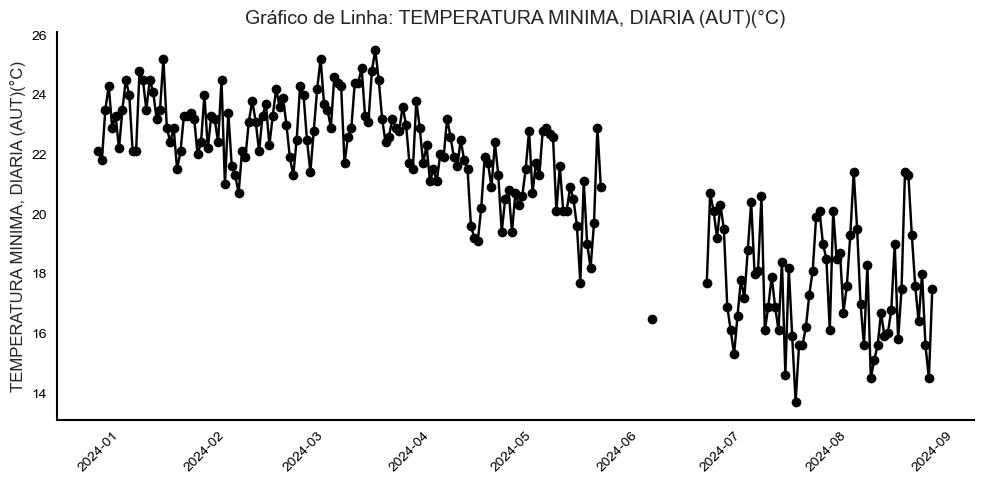

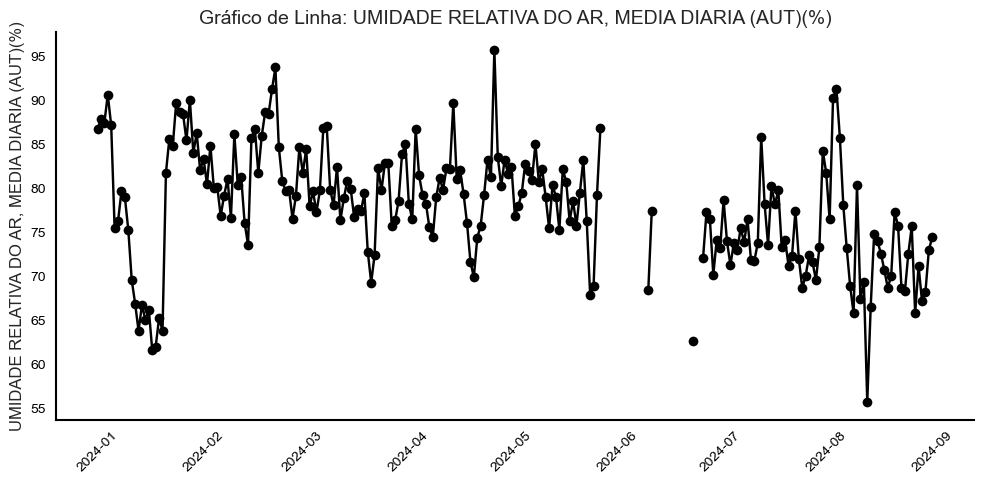

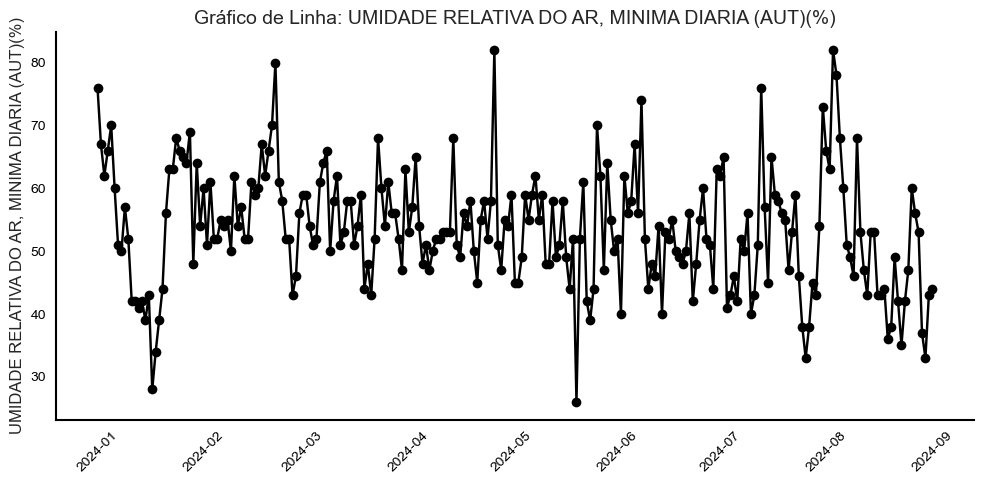

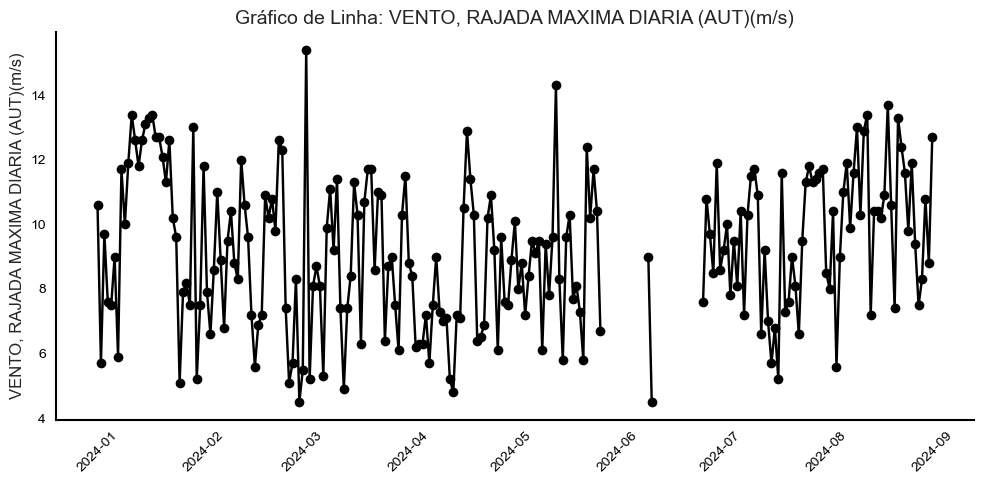

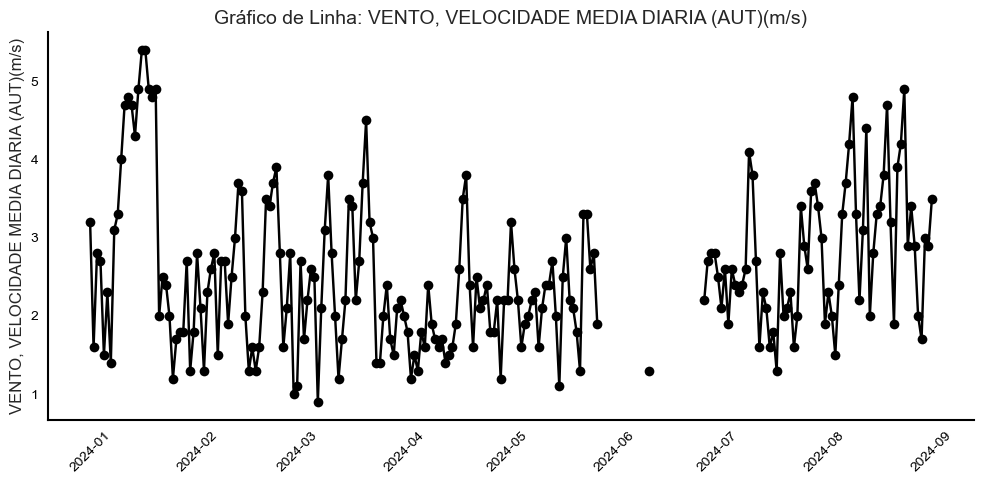

In [14]:
# Converter a coluna 'Data Medicao' para o formato de data
df['Data Medicao'] = pd.to_datetime(df['Data Medicao'])

# Definir as colunas para plotar (excluindo 'Data Medicao' e colunas indesejadas)
colunas_para_plotar = numdf.columns  # Ajuste conforme necessário

# Criar gráficos de linha para cada variável ao longo do tempo
for coluna in colunas_para_plotar:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df['Data Medicao'], df[coluna], marker='o', color='black')

    # Título e rótulos com fonte Arial
    ax.set_title(f'Gráfico de Linha: {coluna}', fontdict={'family': 'Arial', 'size': 14})
    ax.set_ylabel(coluna, fontdict={'family': 'Arial', 'size': 12})

    # Estilo dos eixos
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1.5)

    # Ticks pretos
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')

    # Sem grade
    ax.grid(False)

    # Rotação nos ticks de data
    plt.xticks(rotation=45)

    # Layout ajustado
    plt.tight_layout()
    plt.show()

**PRECIPITACAO TOTAL, DIARIO (AUT)(mm):**

O gráfico de linha mostra que a precipitação é concentrada especialmente em fevereiro, quando há picos significativos, chegando a mais de 70 mm em um dia. Logo após, há uma clara redução nas chuvas.

**PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB):**

O gráfico de linha mostra um aumento gradual na pressão ao longo do tempo, indicando uma possível estabilização atmosférica conforme os meses passam. No início do ano, a pressão atmosférica estava em níveis mais baixos, oscilando em torno de 1005 mB a 1010 mB, o que pode indicar instabilidade climática. Ao longo dos meses, há um aumento notável na pressão, alcançando valores próximos a 1020 mB em setembro, sugerindo um período de maior estabilidade atmosférica.

**TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C):**

O gráfico de linha mostra que, no início do ano, os valores se mantêm elevados, em torno de 22°C a 24°C, sugerindo alta umidade. A partir de maio, há uma tendência de queda gradual, com temperaturas de ponto de orvalho caindo abaixo de 16°C em alguns momentos. Essa queda acentuada na temperatura do ponto de orvalho no meio do ano pode indicar uma redução na umidade do ar.

**TEMPERATURA MAXIMA, DIARIA (AUT)(°C):**

O gráfico de linha mostra uma oscilação significativa ao longo dos meses, com picos notáveis logo no início do ano, indicando um período de calor intenso. No entanto, mesmo em janeiro, há momentos em que as temperaturas caem de forma abrupta, sugerindo variações significativas nas condições climáticas. Entre fevereiro e março, as máximas continuam elevadas, com algumas oscilações, porém, mantendo-se em torno de 30°C a 34°C. A partir de abril, observa-se uma queda gradual nas temperaturas máximas, sem os picos de calor registrados no início do ano.

**TEMPERATURA MEDIA, DIARIA (AUT)(°C):**

O gráfico de linha indica um período mais quente no início do ano. A partir de abril, observa-se uma tendência de queda, com temperaturas médias oscilando em torno de 24°C. Entre junho e agosto, a temperatura cai ainda mais, com algumas variações abaixo de 22°C, sugerindo uma transição para um período mais frio. A partir de agosto, a temperatura volta a oscilar mais fortemente, com picos e quedas acentuadas.

**TEMPERATURA MINIMA, DIARIA (AUT)(°C):**

O gráfico de linha mostra que, no início do ano, as temperaturas mínimas variam entre 22°C e 26°C, indicando um período quente. A partir de abril, há uma queda gradual nas temperaturas mínimas, com flutuações mais frequentes entre 18°C e 22°C. Em julho e agosto, observam-se oscilações ainda maiores, com quedas chegando a 16°C em alguns dias, sugerindo um período mais frio.

**UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%):**

O gráfico de linha mostra que, em janeiro, há uma queda acentuada nos níveis de umidade, seguida de um aumento considerável até o final do mês, indicando um período mais úmido em fevereiro. A partir de março, a umidade segue com variações moderadas, mas relativamente estáveis, onde os níveis de umidade permanecem mais baixos em comparação com o período anterior.

**UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%):**

O gráfico de linha da umidade relativa mínima mostra uma grande variabilidade ao longo do período observado. No início de janeiro, há uma queda acentuada nos níveis de umidade mínima, indicando condições mais secas. Em seguida, ocorre uma recuperação com picos mais elevados em fevereiro, sugerindo um aumento nas condições de umidade. Durante março e abril, a umidade mínima oscila de forma consistente, sem grandes mudanças. Entre maio e junho, há uma nova queda nos níveis de umidade mínima, apontando para um período mais seco. No entanto, em julho e início de agosto, a umidade mínima aumenta novamente. A partir de meados de agosto, o gráfico evidencia uma nova queda acentuada nos níveis de umidade até setembro, sugerindo um retorno a condições mais secas ao final do período analisado.

**VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s):**

O gráfico de linha mostra que, entre janeiro e fevereiro, as rajadas atingem picos altos, com alguns momentos ultrapassando os 14 m/s, indicando ventos fortes no começo do ano. Durante os meses seguintes, as rajadas de vento continuam a variar, com picos entre 10 e 12 m/s a partir de março, chegando a variar entre 6 e 10 m/s no início de abril. Há um aumento nas rajadas de vento, com novos picos significativos, principalmente no final de agosto e início de setembro, onde novamente observam-se rajadas superiores a 12 m/s.

**VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s):**

O gráfico de linha revela picos na velocidade média do vento, com valores superiores a 4 m/s observados principalmente em janeiro e fevereiro. No restante do ano, a velocidade média do vento é mais moderada, apesar da ocorrência de alguns picos. A partir de julho, observa-se um aumento na velocidade média dos ventos, que permanece mais elevada no mês de agosto.

## HEATMAP

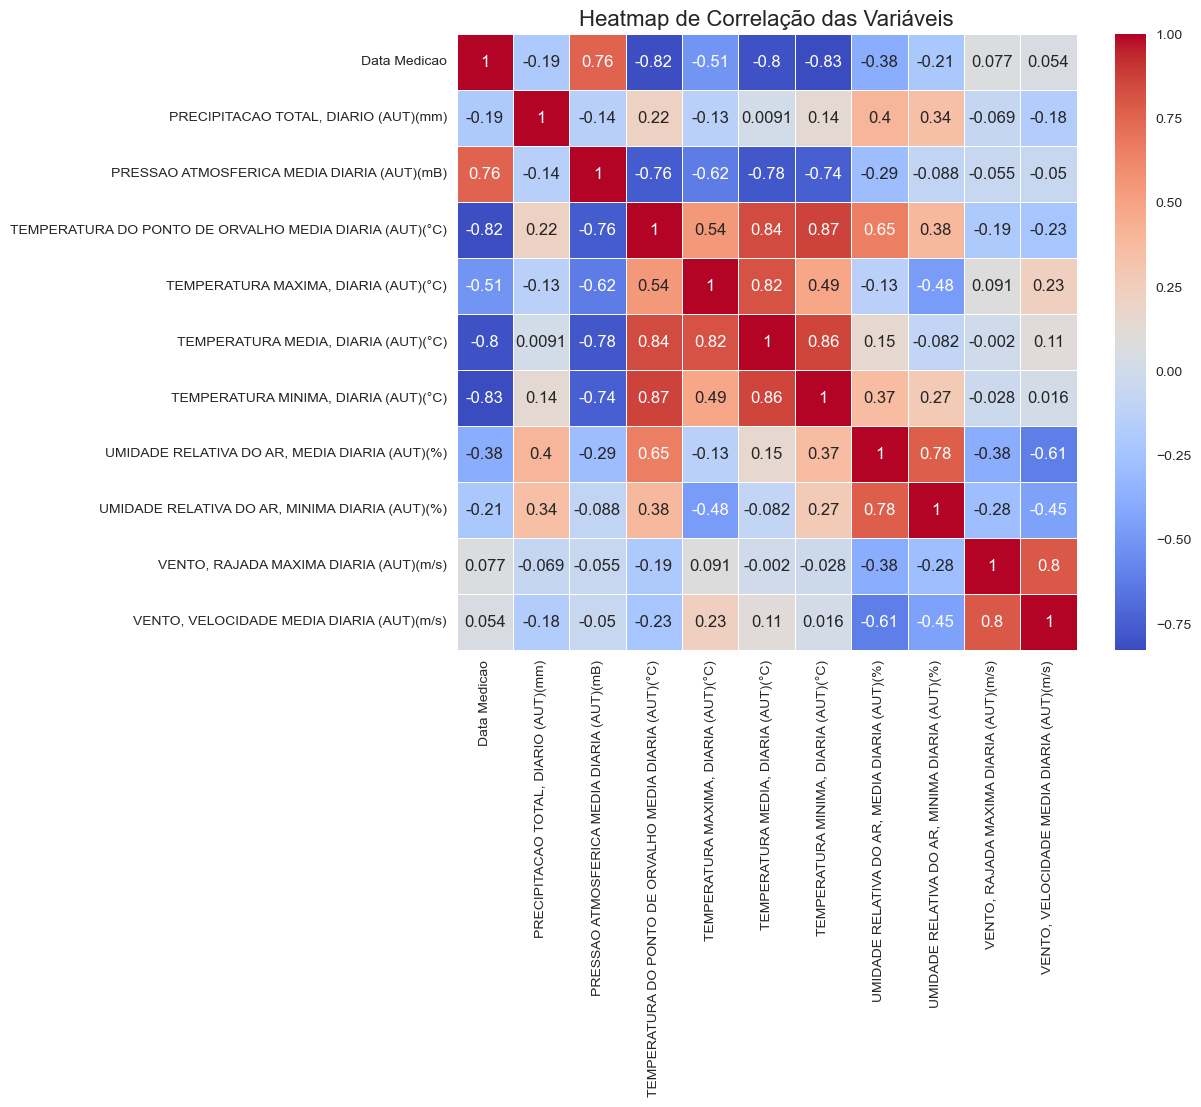

In [7]:
# Gerar a matriz de correlação
correlacao = df.corr()

# Configurar o tamanho do gráfico
plt.figure(figsize=(10,8))

# Criar o heatmap
sns.heatmap(correlacao, annot=True, cmap="coolwarm", linewidths=0.5)

# Título do gráfico
plt.title("Heatmap de Correlação das Variáveis", fontsize=16)

# Exibir o gráfico
plt.show()

Embora o heatmap tenha sido gerado para visualizar as correlações entre as variáveis, optou-se por não utilizá-lo como critério de exclusão de variáveis. Ao analisar o impacto da exclusão de variáveis com alta correlação, observou-se que o aumento no coeficiente de silhueta foi muito pequeno, o que indicou que a remoção dessas variáveis não trouxe melhorias significativas na qualidade dos clusters. Para garantir que nenhuma informação relevante fosse perdida, decidiu-se manter todas as variáveis no modelo.

Além disso, a análise estatística por meio do teste ANOVA demonstrou que todas as variáveis contribuíram de forma significativa para a formação de pelo menos um dos clusters. Isso reforçou a decisão de preservar todas as variáveis.

# DADOS NULOS

In [8]:
def mostra_nulos(df):
#Retorna uma tabela com o nome das colunas que possuem valores nulos,
#quantidade de valores nulos, e o percentual de valores nulos sobre o total da variável

  #valores nulos
  total_nulos = df.isnull().sum().sort_values(ascending=False)
  #filtrando colunas que possuem valores nulos
  colunas_com_nulos = total_nulos[total_nulos > 0]
  #porcentagem de valores nulos por coluna
  porcentagem_nulos = (df.isnull().sum() / len(df) * 100).round(2)
  #dataframe
  df_nulos = pd.DataFrame({
          'Colunas': colunas_com_nulos.index,
          'Qtde Nulos': colunas_com_nulos.values,
          'Porcentagem Nulos': porcentagem_nulos[colunas_com_nulos.index].values
      })
  return df_nulos

mostra_nulos(df)

,Colunas,Qtde Nulos,Porcentagem Nulos
0,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",33,13.47
1,"TEMPERATURA MEDIA, DIARIA (AUT)(°C)",33,13.47
2,PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),29,11.84
3,TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (...,29,11.84
4,"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)",29,11.84
5,"TEMPERATURA MINIMA, DIARIA (AUT)(°C)",29,11.84
6,"VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",29,11.84
7,"VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)",27,11.02
8,"UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)",26,10.61


## Interpolação temporal

As variáveis que apresentam valores nulos têm uma característica em comum: elas seguem uma série temporal e, em muitos casos, variam de forma gradual e contínua ao longo do tempo, o que torna a interpolação linear uma escolha justificada para o preenchimento dos valores ausentes.

In [9]:
# Interpolação temporal para preencher valores nulos
df.interpolate(method='linear', inplace=True)

In [10]:
# Verificar se há valores nulos restantes após a interpolação
print(df.isnull().sum())

Data Medicao                                              0
PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                      0
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)                0
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)    0
TEMPERATURA MAXIMA, DIARIA (AUT)(°C)                      0
TEMPERATURA MEDIA, DIARIA (AUT)(°C)                       0
TEMPERATURA MINIMA, DIARIA (AUT)(°C)                      0
UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)             0
UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)            0
VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)                    0
VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)                 0
dtype: int64


# CLUSTERIZAÇÃO

## PADRONIZAÇÃO DOS DADOS

É necessária a padronização dos dados antes de aplicar o K-Means, já que o algoritmo utiliza a distância euclidiana para medir a similaridade entre os pontos, e essa distância é sensível à escala das variáveis. Se as variáveis possuem magnitudes diferentes, como temperatura e precipitação, variáveis com valores maiores podem dominar o cálculo das distâncias e influenciar indevidamente os resultados da clusterização.

A padronização coloca todas as variáveis na mesma escala, garantindo que cada uma contribua de forma equitativa para o processo de clusterização.

In [12]:
numdf = df.select_dtypes(include=['float64', 'int64'])
#é preciso rodar de novo numdf para que reconheça o tratamento dos valores nulos

In [13]:
numdf.head()

,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,1.0,1010.4,20.6,24.7,23.0,22.1,86.8,76,10.6,3.2
1,7.4,1008.8,21.8,28.7,24.1,21.8,87.9,67,5.7,1.6
2,1.0,1008.1,23.2,29.7,25.6,23.5,87.5,62,9.7,2.8
3,1.2,1006.0,23.9,30.4,25.7,24.3,90.7,66,7.6,2.7
4,13.6,1005.0,22.6,29.4,25.0,22.9,87.2,70,7.5,1.5


In [14]:
# Calcular a média de cada coluna
medias = numdf.mean()

# Calcular o desvio padrão de cada coluna
desvios = numdf.std()

# Exibir os resultados
print("Médias:")
print(medias)

print("\nDesvios Padrão:")
print(desvios)

Médias:
PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                         2.905714
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)                1012.185306
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)      20.198367
TEMPERATURA MAXIMA, DIARIA (AUT)(°C)                        30.559796
TEMPERATURA MEDIA, DIARIA (AUT)(°C)                         24.671020
TEMPERATURA MINIMA, DIARIA (AUT)(°C)                        20.537551
UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)               77.415102
UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)              53.506122
VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)                       8.950408
VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)                    2.442245
dtype: float64

Desvios Padrão:
PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                      8.085224
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)                3.929607
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)    2.593495
TEMPERATURA MAXIMA, DIARIA (AUT)(°C)                      2

In [16]:
#normalizando os dados
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(numdf)
normdf = pd.DataFrame(dados_normalizados, columns=numdf.columns)
normdf.head()

,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,-0.236186,-0.455252,0.155179,-2.422938,-0.817778,0.560035,1.386247,2.391583,0.705432,0.803569
1,0.557002,-0.863251,0.618822,-0.768998,-0.279451,0.452505,1.548728,1.434689,-1.390006,-0.893167
2,-0.236186,-1.041750,1.159739,-0.355513,0.454632,1.061843,1.489644,0.903082,0.320556,0.379385
3,-0.211399,-1.577249,1.430198,-0.066073,0.503570,1.348590,1.962317,1.328368,-0.577489,0.273339
4,1.325403,-1.832248,0.927917,-0.479558,0.160999,0.846783,1.445331,1.753654,-0.620253,-0.999213


In [17]:
# Calcular a média de cada coluna
medias_norm = normdf.mean()

# Calcular o desvio padrão de cada coluna
desvios_norm = normdf.std()

# Exibir os resultados
print("Médias (normdf):")
print(medias_norm)

print("\nDesvios Padrão (normdf):")
print(desvios_norm)

Médias (normdf):
PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                     -2.900174e-17
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)               -2.494150e-15
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)   -6.960419e-16
TEMPERATURA MAXIMA, DIARIA (AUT)(°C)                     -1.044063e-15
TEMPERATURA MEDIA, DIARIA (AUT)(°C)                       5.800349e-17
TEMPERATURA MINIMA, DIARIA (AUT)(°C)                     -1.160070e-15
UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)             2.755166e-15
UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)            2.900174e-16
VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)                   -1.721979e-16
VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)                 6.307879e-16
dtype: float64

Desvios Padrão (normdf):
PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                      1.002047
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)                1.002047
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)    1.002047
TEMPERATURA MAXIMA, DIARIA (AUT

## MÉTODO DE ELBOW

Agora, vamos aplicar o Método de Elbow para identificar a quantidade ideal de clusters que devemos utilizar para separar as observações.

Para garantir que a inicialização aleatória não mude a numeração ou a separação dos clusters a cada execução, vamos definir o parâmetro random_state ao aplicar o K-Means. Isso garante que a ordem dos clusters seja sempre a mesma, facilitando a comparação e a reprodutibilidade dos resultados. Além disso, ao fixar o random_state, os centróides dos clusters também se mantêm consistentes em cada execução.

A escolha do número 42 é arbitrária e amplamente utilizada na comunidade de programação, mas poderia ser substituída por qualquer número inteiro. O objetivo principal é garantir que o agrupamento dos dados não varie entre execuções.

c:\Users\Matheus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Matheus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Matheus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Matheus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

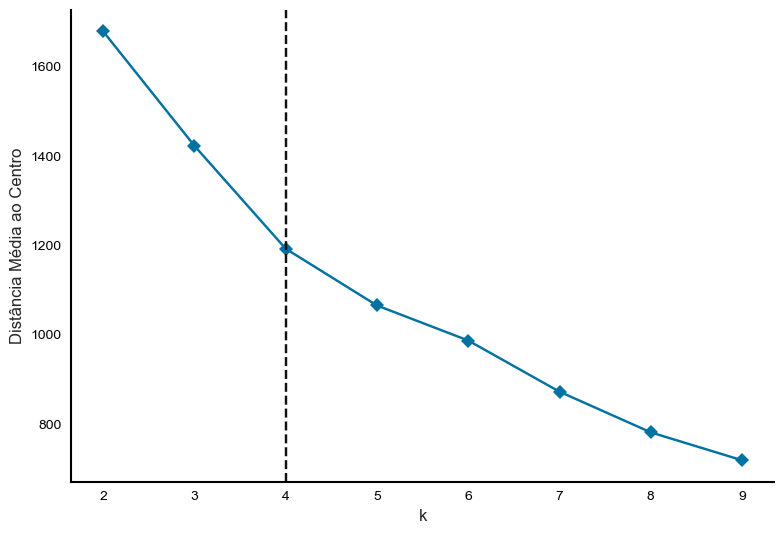

In [19]:
# Criar visualizer com curva verde desativada
visualizer = KElbowVisualizer(
    KMeans(random_state=42), 
    k=(2, 10), 
    timings=False  # Remove a curva verde (derivada)
)

# Treinar
visualizer.fit(normdf)

# Personalizações
ax = visualizer.ax

# Remover grade
ax.grid(False)

# Remover spines (bordas)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Eixos com cor preta e largura 1.5 pt
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)

# Ticks pretos
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Fonte Arial nos eixos
ax.set_xlabel("k", fontdict={'family': 'Arial', 'size': 12})
ax.set_ylabel("Distância Média ao Centro", fontdict={'family': 'Arial', 'size': 12})

# Ajustar layout final
plt.tight_layout()
plt.show()

O método sugere a formação de 4 clusters.



In [21]:
print(f"Valor do cotovelo: {visualizer.elbow_score_:.2f}")

Valor do cotovelo: 1192.58


In [22]:
# Obter os pontos do gráfico de cotovelo
k_values = visualizer.k_values_
distances = visualizer.k_scores_

# Combinar em uma tabela
df_elbow = pd.DataFrame({
    "k": k_values,
    "Distância Média ao Centro": distances
})

# Visualizar a tabela
print(df_elbow)

   k  Distância Média ao Centro
0  2                1679.155557
1  3                1422.961408
2  4                1192.584925
3  5                1065.583376
4  6                 987.082389
5  7                 872.492995
6  8                 781.498290
7  9                 718.978867


## APLICAÇÃO DO MÉTODO K-MEANS

In [23]:
#aplicando o método
kmeans = KMeans(n_clusters = 4, random_state = 42)
df['Clusters'] = kmeans.fit_predict(normdf)

c:\Users\Matheus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
#verificando a coluna 'Clusters' inserida no dataframe
df['Clusters'].unique()

array([2, 0, 1, 3])

In [25]:
df.head()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)",Clusters
0,2024-01-01,1.0,1010.4,20.6,24.7,23.0,22.1,86.8,76,10.6,3.2,2
1,2024-01-02,7.4,1008.8,21.8,28.7,24.1,21.8,87.9,67,5.7,1.6,2
2,2024-01-03,1.0,1008.1,23.2,29.7,25.6,23.5,87.5,62,9.7,2.8,0
3,2024-01-04,1.2,1006.0,23.9,30.4,25.7,24.3,90.7,66,7.6,2.7,0
4,2024-01-05,13.6,1005.0,22.6,29.4,25.0,22.9,87.2,70,7.5,1.5,2


## VALIDAÇÃO E VISUALIZAÇÃO DOS CLUSTERS

Para validar a qualidade da separação dos clusters, aplicamos o coeficiente de silhueta, que mede o grau de separação entre os clusters, indicando quão bem as observações estão agrupadas.

In [20]:
silhueta = silhouette_score(normdf, df['Clusters'])
print('Coeficiente de Silhueta:', silhueta)

Coeficiente de Silhueta: 0.2872487596814397


O coeficiente de silhueta foi de 0.287, o que sugere uma separação razoável entre os clusters, embora ainda haja uma leve sobreposição entre eles.

Além do coeficiente de silhueta, utilizamos o PCA (Análise de Componentes Principais) para reduzir a dimensionalidade dos dados e visualizar a separação dos clusters em duas dimensões. Isso nos dá uma forma gráfica de validar a separação dos grupos identificados pelo K-Means.

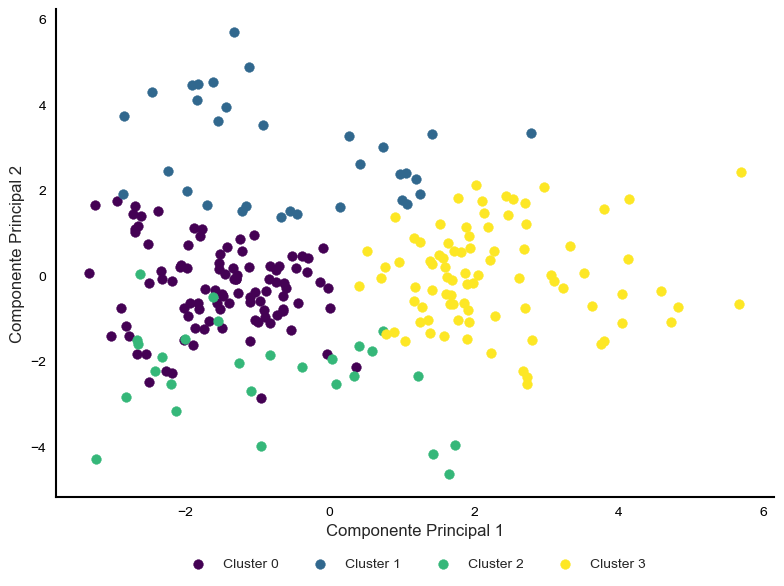

In [21]:
# Reduzir para 2 componentes principais 
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normdf)

plt.figure(figsize=(8,6))
plt.grid(False)

# Cores do cmap viridis
unique_clusters = sorted(df['Clusters'].unique())
colors = cm.viridis(np.linspace(0, 1, len(unique_clusters)))

# Plotar cada cluster separadamente com cores viridis
for cluster, color in zip(unique_clusters, colors):
    indices = df['Clusters'] == cluster
    plt.scatter(
        pca_data[indices, 0],
        pca_data[indices, 1],
        label=f'Cluster {cluster}',
        color=color
    )

# Eixos com fonte Arial e tamanho 12
plt.xlabel('Componente Principal 1', fontdict={'family': 'Arial', 'size': 12})
plt.ylabel('Componente Principal 2', fontdict={'family': 'Arial', 'size': 12})

# Legenda tradicional abaixo
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=len(unique_clusters),
    fontsize=12,
    title_fontsize=12,
    prop={'family': 'Arial'},
    frameon=False
)

# Ajuste dos eixos e cores
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Eixos com cor preta e largura 1.5 pt
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)

# Ticks dos eixos também em preto
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.tight_layout()
plt.show()

Observando o gráfico, podemos observar uma separação razoável entre os clusters, embora alguns grupos estejam mais próximos, o que reflete a leve sobreposição indicada pelo coeficiente de silhueta.

A explicação para essa sobreposição pode estar relacionada à natureza dos dados meteorológicos, onde certas condições climáticas não são claramente delimitadas em categorias, mas sim variam gradualmente. Contudo, mesmo com a sobreposição, é possível ver que os clusters estão dispostos de forma coerente, onde cada grupo captura características específicas das observações.

## ANÁLISE DE VARIÂNCIA (ANOVA)

A Análise de Variância (ANOVA) é uma técnica estatística utilizada para verificar se as médias de diferentes grupos, neste caso, clusters, são significativamente diferentes entre si. Ao aplicar o K-Means, a ANOVA permite identificar se as variáveis numéricas foram relevantes para a formação dos clusters e se há distinções significativas entre as observações agrupadas. Nesse contexto, a ANOVA foi aplicada para cada variável do dataset, verificando se cada uma delas contribuiu para a diferenciação entre os clusters. Resultados com baixos valores de p-unc indicam que a variável possui um impacto relevante na formação de pelo menos um dos clusters.

In [ ]:
# Inicializar um dicionário para armazenar os resultados
resultados_anova = {}

# Executar ANOVA para cada variável numérica
for coluna in numdf:
    anova_resultado = pg.anova(dv=coluna, between='Clusters', data=df, detailed=True).T
    resultados_anova[coluna] = anova_resultado

# Exibir o resultado da ANOVA para todas as variáveis
for coluna, resultado in resultados_anova.items():
    print(f"ANOVA para {coluna}:\n", resultado, "\n")

ANOVA para PRECIPITACAO TOTAL, DIARIO (AUT)(mm):
                   0            1
Source     Clusters       Within
SS       8085.55687  7864.930241
DF                3          241
MS      2695.185623    32.634565
F          82.58684          NaN
p-unc           0.0          NaN
np2        0.506916          NaN 

ANOVA para PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB):
                   0            1
Source     Clusters       Within
SS      1579.312317  2188.488979
DF                3          241
MS       526.437439     9.080867
F         57.972155          NaN
p-unc           0.0          NaN
np2         0.41916          NaN 

ANOVA para TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C):
                   0           1
Source     Clusters      Within
SS      1173.178669  468.018206
DF                3         241
MS       391.059556    1.941984
F        201.371126         NaN
p-unc           0.0         NaN
np2        0.714831         NaN 

ANOVA para TEMPERATURA MAXIMA, DIARI

In [24]:
# Exibir o resultado da ANOVA para todas as variáveis
for coluna, resultado in resultados_anova.items():
    f_statistic = resultado['F'][0]  # Estatística F
    p_value = resultado['p-unc'][0]  # p-valor exato
    
    print(f"ANOVA para {coluna}:")
    print(f"Estatística F: {f_statistic}")
    print(f"P-valor: {p_value}")
    print("-" * 30)

ANOVA para PRECIPITACAO TOTAL, DIARIO (AUT)(mm):
Estatística F: 82.58683996752976
P-valor: 8.819906363047079e-37
------------------------------
ANOVA para PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB):
Estatística F: 57.972155225571036
P-valor: 2.9973342745243125e-28
------------------------------
ANOVA para TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C):
Estatística F: 201.3711258434362
P-valor: 2.3009562257566367e-65
------------------------------
ANOVA para TEMPERATURA MAXIMA, DIARIA (AUT)(°C):
Estatística F: 58.58800968213693
P-valor: 1.760060929427193e-28
------------------------------
ANOVA para TEMPERATURA MEDIA, DIARIA (AUT)(°C):
Estatística F: 152.97365438946454
P-valor: 1.6151965365789664e-55
------------------------------
ANOVA para TEMPERATURA MINIMA, DIARIA (AUT)(°C):
Estatística F: 176.5760935469423
P-valor: 1.496686165336196e-60
------------------------------
ANOVA para UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%):
Estatística F: 134.9731215335429
P-valor: 2.514891

Com base nos resultados da ANOVA, que mostraram que todas as variáveis tiveram um p-valor (p-unc) = 0, isso sugere que cada variável contribuiu para a formação de pelo menos um dos clusters.

## ANÁLISE DOS CLUSTERS

### CONTAGEM DE OBSERVAÇÕES POR CLUSTER

Primeiramente, vamos contar o número de observações em cada um dos clusters para verificar quantas observações foram associadas a cada grupo.

In [25]:
df['Clusters'].value_counts()

,count
Clusters,
0,100
3,86
1,32
2,27


Podemos representar visualmente esse resultado utilizando um gráfico de barras.



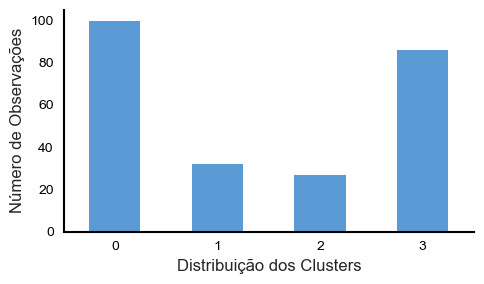

In [44]:
# Contagem por cluster
contagem_clusters = df['Clusters'].value_counts().sort_index()

# Criar gráfico de barras
ax = contagem_clusters.plot(
    kind='bar',
    color='#5b9bd5',
    rot=0,
    figsize=(5, 3)
)

# Eixos com fonte Arial 12 (sem negrito)
plt.xlabel('Distribuição dos Clusters', fontdict={'family': 'Arial', 'size': 12})
plt.ylabel('Número de Observações', fontdict={'family': 'Arial', 'size': 12})

# Remover grade
plt.grid(False)

# Ajustes visuais nos eixos
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Cor preta e espessura 1.5 pt nos eixos
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)

# Ticks (números dos eixos) também em preto
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.tight_layout()
plt.show()

O cluster 0 apresenta o maior número de observações, seguido pelo cluster 3, com uma diferença considerável em relação aos outros dois grupos. Essa diferença na quantidade de observações por cluster indica uma maior frequência de dias com características similares às observadas nos clusters 0 e 3, enquanto os clusters 1 e 2 representam grupos com características menos frequentes.

### MÉDIAS POR CLUSTER

Para uma melhor compreensão dos grupos formados na clusterização, vamos calcular a média de cada variável dentro de cada cluster. Essa análise nos permitirá identificar padrões e características predominantes em cada grupo, facilitando a interpretação dos resultados e possibilitando a definição de condições climáticas associadas a cada cluster.



In [26]:
# Agrupar os dados por cluster e calcular a média para cada variável
medias_por_cluster = df.groupby('Clusters').mean(numeric_only=True)

# Renomear os índices
medias_por_cluster.index = [f'Cluster {i}' for i in medias_por_cluster.index]

# Remover o nome do índice
medias_por_cluster.index.name = None

# Exibir
medias_por_cluster

,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
Cluster 0,1.009000,1010.148000,22.270000,31.623000,26.102000,22.520000,80.884000,55.350000,8.237000,2.099000
Cluster 1,0.031250,1010.146875,20.000000,32.965625,26.243750,21.653125,70.009375,43.343750,11.834375,4.081250
Cluster 2,19.201481,1011.245185,21.719259,28.441481,24.212500,21.797778,87.026455,66.333333,8.855026,2.165185
Cluster 3,1.064651,1015.607907,17.385814,29.093372,22.565843,17.421628,73.119601,51.116279,8.736794,2.318488


Para uma análise mais detalhada, vamos calcular a média geral de cada variável numérica e compará-la com as médias obtidas em cada cluster. Assim, será possível identificar quais grupos apresentam comportamentos que se desviam do padrão geral. Juntamos essas médias gerais ao DataFrame contendo as médias de cada cluster, o que facilita a visualização e interpretação dos padrões característicos de cada grupo.

In [27]:
# Calcular a média geral de cada variável numérica no DataFrame
media_geral = df.mean(numeric_only=True)

# Criar um DataFrame com a média geral e renomear a linha para 'Média Geral'
media_geral_df = pd.DataFrame(media_geral).T
media_geral_df.index = ['Média Geral']

# Agrupar os dados por cluster e calcular a média para cada variável
medias_por_cluster = df.groupby('Clusters').mean(numeric_only=True)

# Renomear os índices para 'Cluster 0', 'Cluster 1', etc.
medias_por_cluster.index = [f'Cluster {i}' for i in medias_por_cluster.index]
medias_por_cluster.index.name = None  # Remover o título do índice

# Concatenar a média geral com as médias por cluster
comparacao_medias = pd.concat([media_geral_df, medias_por_cluster])

# Se existir uma coluna 'Clusters', remover
comparacao_medias = comparacao_medias.drop(columns=['Clusters'], errors='ignore')

# Exibir resultado
comparacao_medias

,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
Média Geral,2.905714,1012.185306,20.198367,30.559796,24.671020,20.537551,77.415102,53.506122,8.950408,2.442245
Cluster 0,1.009000,1010.148000,22.270000,31.623000,26.102000,22.520000,80.884000,55.350000,8.237000,2.099000
Cluster 1,0.031250,1010.146875,20.000000,32.965625,26.243750,21.653125,70.009375,43.343750,11.834375,4.081250
Cluster 2,19.201481,1011.245185,21.719259,28.441481,24.212500,21.797778,87.026455,66.333333,8.855026,2.165185
Cluster 3,1.064651,1015.607907,17.385814,29.093372,22.565843,17.421628,73.119601,51.116279,8.736794,2.318488


### INTERPRETAÇÃO DOS CLUSTERS

#### CLUSTER 0:

Este cluster caracteriza-se por registrar uma precipitação total de 1,01 mm, valor abaixo da média geral, sugerindo dias relativamente secos. A pressão atmosférica nesse cluster é de 1010,15 mB, ligeiramente inferior à média geral, indicando uma possível instabilidade nos dias, embora sem grandes variações. A temperatura do ponto de orvalho, de 22,27°C, está acima da média geral, evidenciando alta umidade do ar. As temperaturas máximas alcançam 31,62°C, também superiores à média geral, caracterizando dias quentes, enquanto as temperaturas médias e mínimas, de 26,1°C e 22,52°C, respectivamente, reforçam essa característica de calor. A umidade relativa média é de 80,88%, acima da média geral, o que contribui para a sensação de dias úmidos e, potencialmente, desconfortáveis devido à alta sensação térmica. Mesmo nos momentos mais secos, a umidade mínima registrada é de 55,35%, ainda superior à média geral. A velocidade média do vento é moderada, com 2,09 m/s, e as rajadas de vento, com 8,23 m/s, mantêm-se em níveis moderados. Assim, o Cluster 0 pode ser descrito como composto por dias quentes e úmidos, com pouca precipitação e ventos suaves, fatores que podem intensificar a sensação de calor.

#### CLUSTER 1:

Este cluster representa dias praticamente secos, com apenas 0,03 mm de precipitação, valor significativamente abaixo da média geral. A pressão atmosférica, de 1010,15 mB, é semelhante à do Cluster 0 e levemente inferior à média geral, indicando um nível de estabilidade moderado. A temperatura do ponto de orvalho, de 20°C, está ligeiramente abaixo da média geral, sugerindo condições de menor umidade. As temperaturas máxima e média, de 32,96°C e 26,24°C respectivamente, indicam dias quentes, enquanto a temperatura mínima, de 21,65°C, ainda elevada em relação à média geral, reforça a predominância de calor nesse cluster. A umidade relativa média é de 70%, abaixo da média geral, o que sugere um ar mais seco, com a umidade mínima de 43,34% reforçando essa característica. Em destaque, o Cluster 1 apresenta ventos fortes, com uma velocidade média de 4,08 m/s e rajadas que atingem 11,83 m/s, o valor mais alto registrado entre os clusters. Assim, o Cluster 1 agrupa dias quentes e secos, com ventos intensos e uma baixa umidade.

#### CLUSTER 2

Este cluster agrupa dias com a maior quantidade de precipitação, totalizando 19,2 mm, valor muito superior à média geral, caracterizando dias chuvosos. A pressão atmosférica nesse cluster é de 1011,25 mB, muito próxima à média geral, sugerindo estabilidade atmosférica, sem grandes variações associadas às chuvas. A temperatura do ponto de orvalho, de 21,72°C, está acima da média geral, indicando maior umidade no ar. As temperaturas máxima e média, de 28,44°C e 24,21°C, são inferiores à média geral, o que sugere dias mais frescos, embora a temperatura mínima, de 21,8°C, permaneça relativamente alta, indicando níveis de calor ainda consideráveis. A umidade relativa média, de 87,02%, é a mais alta entre todos os clusters, reforçando a predominância de alta umidade desse grupo, enquanto a umidade mínima de 66,33% também é consideravelmente elevada. A velocidade média do vento é de 2,16 m/s, com rajadas de 8,85 m/s, caracterizando ventos suaves e moderados. Assim, o Cluster 2 representa dias chuvosos, frescos e extremamente úmidos, com ventos suaves.

#### CLUSTER 3

Este cluster apresenta uma precipitação total de 1,06 mm, indicando dias relativamente secos. A pressão atmosférica é a mais alta entre os clusters, com 1015,61 mB, sugerindo dias mais estáveis e menos sujeitos a variações atmosféricas. A temperatura do ponto de orvalho, de 17,38°C, a mais baixa entre os clusters, reflete a predominância de um ar mais seco. A temperatura máxima, de 29,09°C, está abaixo da média geral, caracterizando dias mais frescos em relação aos outros grupos, assim como a temperatura média, de 22,56°C, que também se encontra abaixo da média geral. A temperatura mínima, de 17,42°C, está consideravelmente abaixo da média geral, reforçando a característica de dias mais frescos nesse cluster. A umidade relativa média, de 73,12%, está ligeiramente abaixo da média geral, indicando condições de umidade moderada, enquanto a umidade mínima, de 51,11%, reflete níveis reduzidos, mas sem extremos de secura. A velocidade média do vento é de 2,32 m/s, ligeiramente inferior à média geral, enquanto as rajadas atingem 8,73 m/s, valores próximos à média, sugerindo ventos suaves a moderados. Assim, o Cluster 3 caracteriza-se por dias estáveis, relativamente frescos, com umidade moderada e ventos suaves.

# CONCLUSÃO

A análise aprofundada das variáveis meteorológicas possibilitou a identificação de padrões específicos que divergem da média geral, contribuindo significativamente para a compreensão das dinâmicas climáticas locais. O Cluster 0 apresentou dias quentes e úmidos, com pouca precipitação, ressaltando a necessidade de estratégias para mitigar os efeitos do calor e da alta sensação térmica, especialmente em áreas urbanas densamente povoadas. O Cluster 1 destacou-se por dias quentes, secos e com fortes rajadas de vento, o que aponta para a importância de monitorar os impactos dos ventos intensos, como danos a estruturas urbanas e impactos na vegetação. Já o Cluster 2 revelou dias de chuvas intensas e extrema umidade, reforçando a urgência de estratégias eficazes para prevenir alagamentos e mitigar seus impactos em regiões vulneráveis. Por fim, o Cluster 3 representou dias estáveis, frescos e com umidade moderada, sugerindo condições climáticas confortáveis e favoráveis ao planejamento de atividades ao ar livre. Essa análise ressalta a importância de monitorar as condições climáticas para promover o desenvolvimento de estratégias adaptativas para diferentes cenários meteorológicos.
Apesar de apresentar limitações inerentes ao tratamento de dados climáticos complexos, como a sobreposição entre alguns clusters, o método K-Means, aliado às técnicas de padronização, interpolação linear e análises estatísticas, demonstrou-se eficaz para identificar padrões climáticos relevantes e contribuir para a análise das dinâmicas meteorológicas. O coeficiente de silhueta indicou uma leve sobreposição entre alguns clusters, o que foi confirmado pela Análise de Componentes Principais (PCA), uma característica atribuída à continuidade das variáveis climáticas analisadas, que não apresentam limites claramente definidos. Essa observação reforça a importância de considerar a continuidade e os aspectos naturais das variações climáticas na interpretação dos resultados.
Para estudos futuros, recomenda-se a extensão do período de análise para verificar a consistência dos padrões ao longo do tempo, bem como a inclusão de outras variáveis que possam ampliar a compreensão das dinâmicas atmosféricas. A conexão entre os dados climáticos com informações socioeconômicas pode auxiliar no planejamento de políticas públicas, ao revelar vulnerabilidades como desigualdades na infraestrutura urbana ou maior exposição a alagamentos. Além disso, os resultados apresentados fornecem uma base valiosa para a implementação de sistemas de alerta antecipado e soluções tecnológicas que integrem essas informações ao planejamento urbano.